In [1]:
import osmnxelevate as oe

Users can download the Digital Elevation Model (DEM) for Midland City to run this code in the notebook <a href="https://uwmadison.box.com/s/jyvnoqoj48oqtaawz8b4mxuq4rffz5pa">link</a>

In [2]:
ndst = oe.NetworkDataset(place = "Midland, Midland County, TX, USA",
                        raster_fpath = r"C:\Users\Sidrcs\Documents\Github\Elevation_OSM\Midland_DEM",
                        output_fpath = r"C:\Users\Sidrcs\Documents\Github\Elevation_OSM")

Current working directory changed to C:\Users\Sidrcs\Documents\Github\Elevation_OSM


GeoPackage layer extract code from <a href="https://stackoverflow.com/questions/56165069/can-geopandas-get-a-geopackages-or-other-vector-file-all-layers">StackOverFlow</a>

In [3]:
%%time
ndst.bind_elevation_to_network()

Executing elevation binding process........
Saved edge network to file path C:\Users\Sidrcs\Documents\Github\Elevation_OSM\egde_network.gpkg
Saved edge network to file path C:\Users\Sidrcs\Documents\Github\Elevation_OSM\node_network.gpkg
CPU times: total: 2min 7s
Wall time: 2min 19s


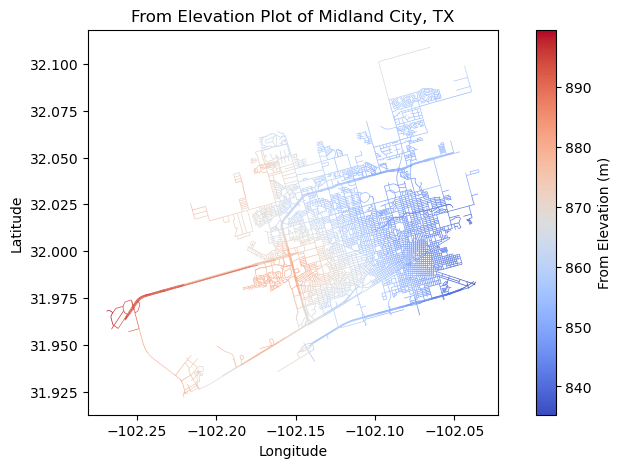

In [42]:
import matplotlib.pyplot as plt
import geopandas as gpd

edge_gdf = gpd.read_file(r"edge_network.gpkg")

# Desired figsize (width, height) in inches
fig, ax = plt.subplots(figsize=(10, 5))

edge_gdf = gpd.read_file(r"edge_network.gpkg")
edge_gdf.plot(ax=ax, linewidth=0.5, column="from_elev", legend=True,
              legend_kwds={"label": "From Elevation (m)", "orientation": "vertical"}, cmap='coolwarm')

ax.set_title('From Elevation Plot of Midland City, TX')
# ax.set_axis_off()
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.savefig("Midland_Edges.png", bbox_inches ="tight", dpi=600)
# Show the plot
plt.show()